# Predicting High Earners
I will be examining the "Adult" dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/2/adult). This dataset includes the feature "income" which has two classes: Those that make more than 50k dollars a year and those that make less than 50k dollars a year. For my supervised machine learning problem, I will be using "income" as label, using the other features of the dataset to predict this label. 

## Importing and Describing the Data

In [27]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.exceptions import DataConversionWarning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Investigate three datasets

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','income']

income_data = pd.read_csv("/Users/stephenzavaleta/utility-scripts/ml1final/adult/adult.data", names=names)
income_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
income_data.describe(include="all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Describing the Features
1. Age: The age of the person in years
2. workclass: E.g. public, private, etc
3. fnlwgt: This value relates representation of the person's demographic traits in the dataset compared to their presentation in the US as a whole
4. Education: A label for the amount of education a person has received, e.g. Bachelors, Doctorate
5. Education-num: The number of years of education a person has received
6. Occupation: The person's job, as a relatively broad category, e.g. Sales
7. Relationship: The person's dominant relation, e.g. Husband, Own-child
8. Race: The person's race
9. Sex: The person's sex
10. capital-gain: The person's capital gains (returns on investments)
11. capital-loss: The person's capital losses (returns on investments)
12. native-country: The country the person was born in
13. income: The label, either greater than 50k or less

Just by their descriptions, I think it's best to drop some columns. Since I'm not applying this analysis to the US as a whole, I won't need fnlwgt. Education and Education-num substantially overlap in meaning, but num-years appears to max out at 16, which should correspond to "bachelors". This make Education alone more expressive and I'll remove education-num. Finally, Relationship has an unclear subject (What makes someone a husband vs a father? Not in family?), so I'll remove it too.

After removing, I'll inspect the data for missing values

In [4]:
income_data = income_data.drop(['fnlwgt', 'education-num', 'relationship'], axis=1)

In [5]:
for col in income_data.columns:
    missing_count = income_data[col].isnull().sum()
    print(f'{col}: {missing_count} missing values')

age: 0 missing values
workclass: 0 missing values
education: 0 missing values
marital-status: 0 missing values
occupation: 0 missing values
race: 0 missing values
sex: 0 missing values
capital-gain: 0 missing values
capital-loss: 0 missing values
hours-per-week: 0 missing values
native-country: 0 missing values
income: 0 missing values


Ok great, no missing values, these can all stay!
### Distributions, correlations, outliers, transforms
Let's do simple scatter plots to show correlations, identify outliers, and find candidates for transforms
#### Distributions

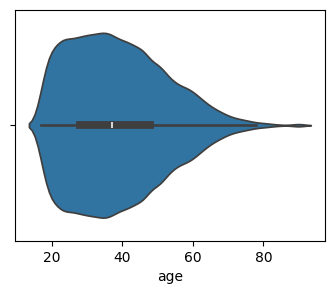

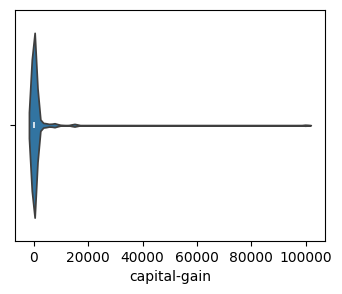

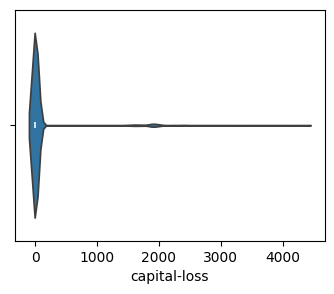

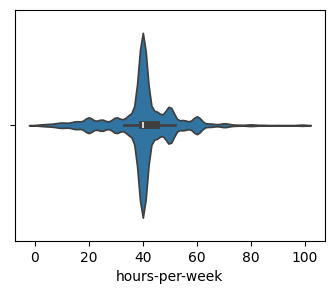

In [6]:
for col in income_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(4, 3)) 
    sns.violinplot(x=income_data[col])
    plt.show()

#### Outliers
I see the possibility of outliers in age, capital gain, capital loss, and hours-per-week. Let's get a quick look at their top 10 unique values.

In [7]:
print(income_data['age'].drop_duplicates().sort_values(ascending=False).head(10))
print(income_data['capital-loss'].drop_duplicates().sort_values(ascending=False).head(10))
print(income_data['capital-gain'].drop_duplicates().sort_values(ascending=False).head(10))
print(income_data['hours-per-week'].drop_duplicates().sort_values(ascending=False).head(10))

222      90
1168     88
31432    87
24027    86
8381     85
6214     84
3963     83
3211     82
918      81
430      80
Name: age, dtype: int64
8963     4356
20416    3900
11902    3770
12600    3683
5309     3004
5713     2824
25793    2754
8321     2603
5979     2559
2414     2547
Name: capital-loss, dtype: int64
1246     99999
6433     41310
106      34095
1764     27828
704      25236
1562     25124
3593     22040
534      20051
17609    18481
6416     15831
Name: capital-gain, dtype: int64
935      99
272      98
7678     97
10377    96
24576    95
9124     94
19160    92
14642    91
1417     90
7142     89
Name: hours-per-week, dtype: int64


Evidently, capital-loss, hours-per-week and age are relatively continuous with their neighobrs. There seems to be a dramatic jump in capital-gain up to 99999, which reads like a truncated value anyway. I am going to remove these rows from the dataset

In [8]:
# My one cleaning step
old_size = income_data.size
income_data = income_data[income_data['capital-gain'] < 99999]
print(old_size - income_data.size, "records removed for having outlier capital-gain")

1908 records removed for having outlier capital-gain


#### Correlations
Ok, let's get a preliminary idea of each features correlation with income. For real valued columns, I'll take the average value of each income class. For categorical values, I'll show the count of each income class for each value

In [9]:
real_value_cols = income_data.select_dtypes(include=['float64', 'int64']).columns
for col in real_value_cols:
    avg_by_income = income_data.groupby('income')[col].mean()
    print(f'\nAverage of {col} by income class:')
    print(avg_by_income)



Average of age by income class:
income
<=50K    36.783738
>50K     44.206196
Name: age, dtype: float64

Average of capital-gain by income class:
income
<=50K     148.752468
>50K     2019.307732
Name: capital-gain, dtype: float64

Average of capital-loss by income class:
income
<=50K     53.142921
>50K     199.037620
Name: capital-loss, dtype: float64

Average of hours-per-week by income class:
income
<=50K    38.840210
>50K     45.383494
Name: hours-per-week, dtype: float64


It looks like there are obvious differences in age, capital-gain, capital-loss, and hours-per week, with a modest difference in number of years of education. I'm going to guess that capital-gain/loss are the most relevant factors for prediction. Now, let's look at categorical variables

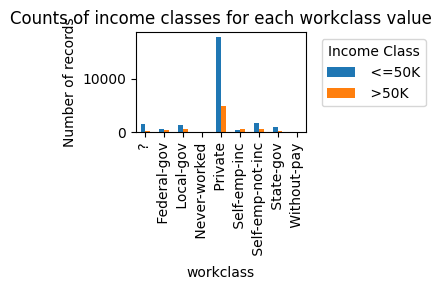

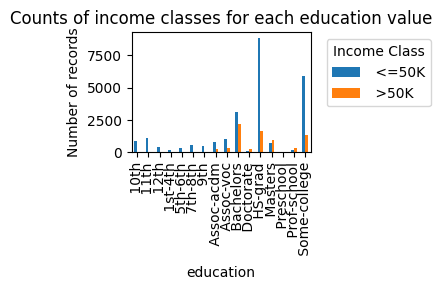

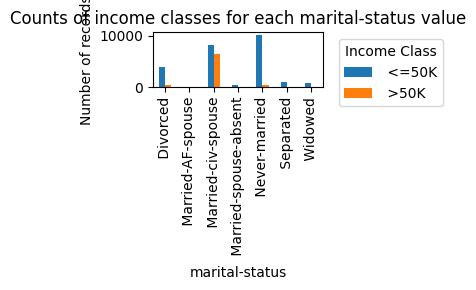

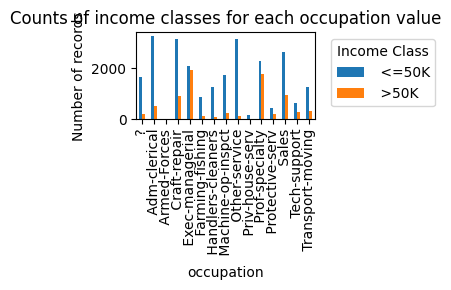

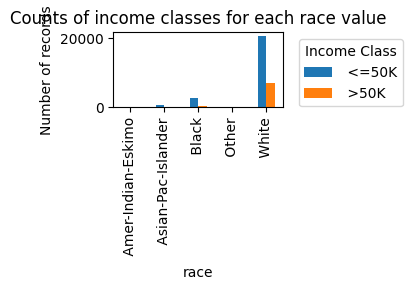

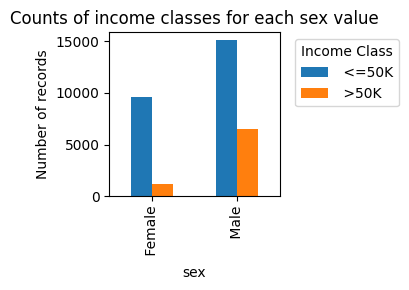

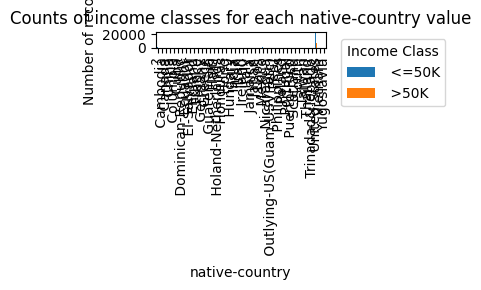

In [10]:
categorical_cols = income_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if col == 'income':
        continue
    count_by_income = income_data.groupby([col, 'income']).size().unstack(fill_value=0)
    count_by_income.plot(kind='bar', stacked=False, figsize=(4,3))
    plt.title(f'Counts of income classes for each {col} value')
    plt.ylabel('Number of records')
    plt.xlabel(col)
    plt.legend(title='Income Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

I notice that literally no category has *more* high earners than low earners, which may make it difficult to use. I also notice that native-country is predominantly US with a small portion Mexico and very few in any other. I will remove that column

In doing these initial correlations, I spot two areas for further cleaning. One of the work-classes is '?' so I'll drop those. The other is native-country is predominantly US with a small portion Mexico and very few in any other. I'll drop those as it's not well shaped as a feature

In [11]:
income_data = income_data[income_data['workclass'] != "?"]
income_data = income_data.drop('native-country', axis=1)

#### Transforms
The violin plots early show a very wide range for capital-gain and capital-loss with a strong skew. That makes it a good candidate for a transform. I note that a doubling of capital gain/loss is likely to be twice as impactful on income, which suggests a log transform. I'll perform that now and show their violin plots

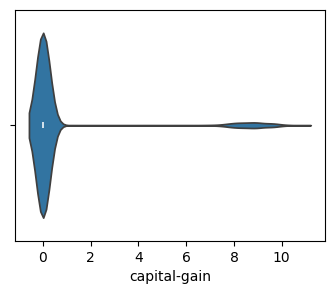

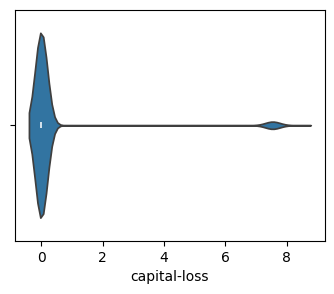

In [12]:
income_data['capital-gain'] = np.log1p(income_data['capital-gain'])
income_data['capital-loss'] = np.log1p(income_data['capital-loss'])
cols = ['capital-gain', 'capital-loss']
for col in cols:
    plt.figure(figsize=(4, 3)) 
    sns.violinplot(x=income_data[col])
    plt.show()
               

## Building and Assessing Models
OK! We're ready to start building models. First, I'll split the data into train/test, which I can use to compare models. Since my classes are imbalanced, I'll use the f1 score as the primary metric. I'll track precision and recall to give further insight into the model

In [13]:
y = income_data[['income']]
y['income'] = y['income'].map({' <=50K': 0, ' >50K': 1})
x = income_data.drop('income', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=91)

### Logistic Regression
Since this is a classification problem, I'll use logistic regression as a baseline. This will require one hot encoding the categorical vars before training and testing. I'll do an example and then do hyper parameter tuning 

In [14]:
x_train_onehot = pd.get_dummies(x_train, drop_first=True)
x_test_onehot = pd.get_dummies(x_test, drop_first=True).reindex(columns=x_train_onehot.columns, fill_value=0)
logistic = LogisticRegression(class_weight='balanced', solver='liblinear').fit(x_train_onehot, y_train)

In [15]:
logistic_y_predicted = logistic.predict(x_test_onehot)
print("precision:" ,precision_score(y_test, logistic_y_predicted) )
print("recall:", recall_score(y_test, logistic_y_predicted))
print("f1:", f1_score(y_test, logistic_y_predicted))

precision: 0.5524861878453039
recall: 0.8338678640153945
f1: 0.6646216768916156


This seems like a pretty poor fit, the precision is not very accurate contributing to low f1 score. 
### Hyperparameter Tuning
Some relevant hyper parameters in logisic are  
C: the regularizaton strength  
penalty: The type of regularization  
solver: Algorithm for optimization  
max_iter: iterations to run waiting for convergence  
class_weight: Ways of handling class imbalance

I specify some reasonable values to try and then use the GridSearchCV to find the best combination
Let's try another model. Random forests do a better job of natively handling a mix of categorical and continuous predictors, so let's use that, using adaboost to ensemble decisi

In [ ]:
# Hyper parameter tuning of logistics regression
param_grid = {
    'C': [0.1, 1, 10, 100], # 1 is default
    'penalty': ['l1', 'l2'], # l2 is default
    'solver': ['liblinear', 'saga'], # lbfgs is default, but liblinear is recommended for small datasets like this one
    'max_iter': [100, 200], # 100 is default
    'class_weight': [None, 'balanced']  # None is default, but balanced is recommended for imbalanced classes like this one
}

# Initialize Logistic Regression model
logistic_base = LogisticRegression()

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_base, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search
grid_search.fit(x_train_onehot, y_train.values.ravel())

# Get the best parameters
print("Best hyperparameters:", grid_search.best_params_)

Ok, I got the result Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Let's build one model with those params and test against the golden dataset

In [19]:
logistic_tuned = LogisticRegression(class_weight='balanced', C=10, max_iter=100, penalty='l2', solver='liblinear').fit(x_train_onehot, y_train)
logistic_tuned_y_predicted = logistic_tuned.predict(x_test_onehot)
print("precision:", precision_score(y_test, logistic_tuned_y_predicted))
print("recall:", recall_score(y_test, logistic_tuned_y_predicted))
print("f1:", f1_score(y_test, logistic_tuned_y_predicted))

precision: 0.553236797274276
recall: 0.8332264271969211
f1: 0.6649603276170976


So, my best Logistic Regression model with tuned hyperparameters has an f1 score of .66
## AdaBoost
Next, I'll build an AdaBoost model. The decision trees its based on naturally handle a max of categorical and continuous features, which I have here. As before, I'll build a model as an example and then run parameter tuning, using f1 score as my primary metric

In [23]:
dt =  DecisionTreeClassifier(max_depth=1, random_state=91)

adaboost_rf = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=91)
adaboost_rf.fit(x_train_onehot, y_train)
y_predicted = adaboost_rf.predict(x_test_onehot)

print("precision:", precision_score(y_test, y_predicted))
print("recall:", recall_score(y_test, y_predicted))
print("f1:", f1_score(y_test, y_predicted))

precision: 0.7595450852965069
recall: 0.5997434252726106
f1: 0.6702508960573477


That's a reasonable start. Interstingly, this time precision is much better than recall, and already the f1 score is higher than logistic regression.
### Hyperparameter Tuning
Let's do some hyper-parameter tuning. Some common hyper parameters are:  
n_estimators: The number of trees in the forest  
max_depth: How deep each tree can go. Typically this 1, a stump, but could be more complicated  
min_samples_split: The number of samples required to split a node  
min_samples_leaf: the number of samples required to be a leaf node  
max_features: The number of features used in each tree, where the default sqrt(n_features)  
class_weight: Optionally handles weighting imbalanced clases, which I have here  

I will specify a reasonable collection of parameters for each, then do a RandomizedSearchCV to find the best value. I tried to perform a GridSearh like for logistric regression, but it's just too expensive to run. I also lower the k-crossfold-validation from 5 to 4


In [25]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.1, 1.0],
    'estimator__max_depth': [1, 2, 5, 10],
    'estimator__min_samples_split': [2, 5, 10, 20],
    'estimator__max_features': ['sqrt', 'log2', 0.5, 0.1],
    'estimator__class_weight': [None, 'balanced']
}

# Initialize the model
base_tree = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(estimator=base_tree)

# Initialize randomized search
random_search = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, n_iter=250, scoring='f1', cv=4, n_jobs=-1, random_state=91)
warnings.filterwarnings("ignore")
random_search.fit(x_train_onehot, y_train.values.ravel())

# Get the best parameters
print(random_search.best_params_)

/Users/stephenzavaleta/.asdf/installs/python/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/stephenzavaleta/.asdf/installs/python/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/stephenzavaleta/.asdf/installs/python/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/stephenzavaleta/.asdf/installs/python/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAM

{'n_estimators': 150, 'learning_rate': 1.0, 'estimator__min_samples_split': 2, 'estimator__max_features': 0.5, 'estimator__max_depth': 2, 'estimator__class_weight': None}


The output I got was {'n_estimators': 250, 'learning_rate': 1.0, 'estimator__min_samples_split': 2, 'estimator__max_features': 0.5, 'estimator__max_depth': 2, 'estimator__class_weight': 'balanced'}. Let's build an adaboost like that and check out the scores

In [26]:
dt =  DecisionTreeClassifier( min_samples_split=2, max_features=0.5, max_depth=2, class_weight='balanced', random_state=91)

adaboost_rf = AdaBoostClassifier(estimator=dt, n_estimators=250, learning_rate=1, random_state=91)
adaboost_rf.fit(x_train_onehot, y_train)
y_predicted = adaboost_rf.predict(x_test_onehot)

print("precision:", precision_score(y_test, y_predicted))
print("recall:", recall_score(y_test, y_predicted))
print("f1:", f1_score(y_test, y_predicted))

precision: 0.6108805901337022
recall: 0.849903784477229
f1: 0.7108369098712446


That f1 score is the best I've seen so far, with a relatively high score for recall giving a high f1 score overall.

## Conclusion
My task was to predict whether adults earn more than 50K dollars a year or not using a dataset from UCI's ML repository. While exploring the data, I removed several columns likely to be irrelevant, filtered out outliers, and transformed features with skewed distributions. Then, I built two classes of model: logistic regression models and AdaBoost models. After demonstrating a best guess set of parameters, I performed a search across many combinations of parameters. 
I evaluated these models against a hold out test set and compared them using F1 Scores, finding that **the best model is an Adaboost model** with parameter like the following: Base Decision Trees with min_samples_split = 5, max_features=0.5, max_depth=2, class_weight='balanced' and AdaBoost with n_estimators=250, learning_rate = 1. This yields an f1 score of .71, on the strength of its high recall, .85.